In [1]:
from pycaret.classification import *

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("../MACH_data/cut_off_by_18avg.csv")
df.tail()

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
44604,4.0,15.0,5.0,1.0,16.0,5.0,1.0,10.0,5.0,1.0,...,Agnostic,Homosexual,White,Yes,Never married,3,83.0,42.0,34.0,7.0
44605,5.0,1.0,10.0,5.0,13.0,5.0,4.0,15.0,11.0,4.0,...,Other,Heterosexual,Asian,No,Never married,1,64.0,31.0,26.0,7.0
44606,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
44607,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,1.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0
44608,2.0,17.0,5.0,1.0,18.0,7.0,1.0,9.0,5.0,1.0,...,Agnostic,Heterosexual,White,No,Never married,3,69.0,34.0,27.0,8.0


In [4]:
df.shape

(44609, 108)

In [5]:
df.columns[40:]

Index(['Q14I', 'Q14E_ppl_brave', 'Q15_TP_abu_good', 'Q15I', 'Q15E_abu_good',
       'Q16_TN_ppl_good', 'Q16I', 'Q16E_ppl_good', 'Q17_VN_ppl_notbad', 'Q17I',
       'Q17E_ppl_notbad', 'Q18_VP_komsu_better', 'Q18I', 'Q18E_komsu_better',
       'Q19_MP_anrocksa_ok', 'Q19I', 'Q19E_anrocksa_ok', 'Q20_VP_money_good',
       'Q20I', 'Q20E_money_good', 'country', 'introelapse', 'testelapse',
       'surveyelapse', 'TYP_out', 'TYP_fight', 'TYP_depnd', 'TYP_anx',
       'TYP_try', 'TYP_quiet', 'TYP_warm', 'TYP_disorg', 'TYP_calm',
       'TYP_stable', 'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6_F', 'VCL7',
       'VCL8', 'VCL9_F', 'VCL10', 'VCL11', 'VCL12_F', 'VCL13', 'VCL14',
       'VCL15', 'VCL16', 'education', 'urban', 'gender', 'engnat', 'age',
       'screenw', 'screenh', 'hand', 'religion', 'orientation', 'race',
       'voted', 'married', 'familysize', 'score', 'v_score', 't_score',
       'm_score'],
      dtype='object')

In [6]:
id_cols = ['education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation', 'race', 'voted', 'married', 'familysize', 'country']

In [7]:
df_id = df[id_cols]
df_id.tail()

,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize,country
44604,University degree,Urban,Male,Yes,19,Right,Agnostic,Homosexual,White,Yes,Never married,3,CA
44605,University degree,Urban,Male,Yes,22,Right,Other,Heterosexual,Asian,No,Never married,1,IE
44606,Graduate degree,Urban,Male,No,29,Right,Other,Heterosexual,Asian,No,Currently married,1,US
44607,High school,Suburban,Female,No,20,Right,Atheist,Homosexual,White,No,Never married,2,PL
44608,High school,Urban,Male,No,31,Right,Agnostic,Heterosexual,White,No,Never married,3,RO


In [8]:
clf = setup(data = df_id, target = 'voted', normalize=True, normalize_method='minmax')

Setup Succesfully Completed!


,Description,Value
0,session_id,3667
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(44609, 13)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [9]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.6567,0.7132,0.7452,0.6515,0.6952,0.3063,0.3101,8.9378
1,Light Gradient Boosting Machine,0.6549,0.7120,0.7370,0.6517,0.6917,0.3031,0.3062,0.3335
2,Extreme Gradient Boosting,0.6538,0.7100,0.7369,0.6505,0.6910,0.3009,0.3040,22.3019
3,Gradient Boosting Classifier,0.6457,0.7047,0.7614,0.6361,0.6931,0.2821,0.2885,6.1633
4,Ada Boost Classifier,0.6455,0.6989,0.7539,0.6375,0.6908,0.2821,0.2877,2.3945
5,Logistic Regression,0.6387,0.6863,0.6871,0.6471,0.6665,0.2732,0.2738,0.6526
6,Linear Discriminant Analysis,0.6388,0.6859,0.6908,0.6461,0.6677,0.2730,0.2738,0.6769
7,Random Forest Classifier,0.6025,0.6435,0.5861,0.6313,0.6078,0.2060,0.2066,0.2399
8,Extra Trees Classifier,0.5996,0.6295,0.6137,0.6203,0.6169,0.1975,0.1976,1.8557
9,K Neighbors Classifier,0.5972,0.6281,0.6665,0.6061,0.6348,0.1880,0.1891,1.0371


#### catboost 

In [10]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6487,0.7025,0.7587,0.6398,0.6942,0.2886,0.2944
1,0.6382,0.7048,0.7569,0.6295,0.6873,0.2665,0.2729
2,0.6628,0.7146,0.7800,0.6491,0.7086,0.3165,0.3241
3,0.6532,0.7115,0.7611,0.6438,0.6976,0.2978,0.3035
4,0.6427,0.7055,0.7508,0.6354,0.6883,0.2764,0.2817
5,0.6539,0.7093,0.7605,0.6446,0.6978,0.2992,0.3048
6,0.6509,0.7131,0.7726,0.6386,0.6992,0.2920,0.2996
7,0.6332,0.6935,0.7555,0.6248,0.6840,0.2563,0.2629
8,0.6413,0.7101,0.7726,0.6291,0.6935,0.2718,0.2802
9,0.6326,0.6821,0.7457,0.6262,0.6808,0.2558,0.2612


In [11]:
gbc_df = pull()

In [12]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6487,0.7060,0.7227,0.6488,0.6838,0.2913,0.2935
1,0.6491,0.7081,0.7337,0.6463,0.6872,0.2911,0.2942
2,0.6711,0.7222,0.7532,0.6652,0.7065,0.3359,0.3392
3,0.6660,0.7282,0.7489,0.6608,0.7021,0.3255,0.3288
4,0.6532,0.7139,0.7282,0.6523,0.6882,0.3003,0.3026
5,0.6596,0.7150,0.7361,0.6572,0.6945,0.3131,0.3156
6,0.6595,0.7217,0.7591,0.6508,0.7008,0.3112,0.3162
7,0.6496,0.7005,0.7433,0.6443,0.6903,0.2916,0.2955
8,0.6560,0.7143,0.7488,0.6497,0.6958,0.3046,0.3086
9,0.6361,0.6899,0.6963,0.6416,0.6678,0.2671,0.2682


In [13]:
lgbm_df = pull()

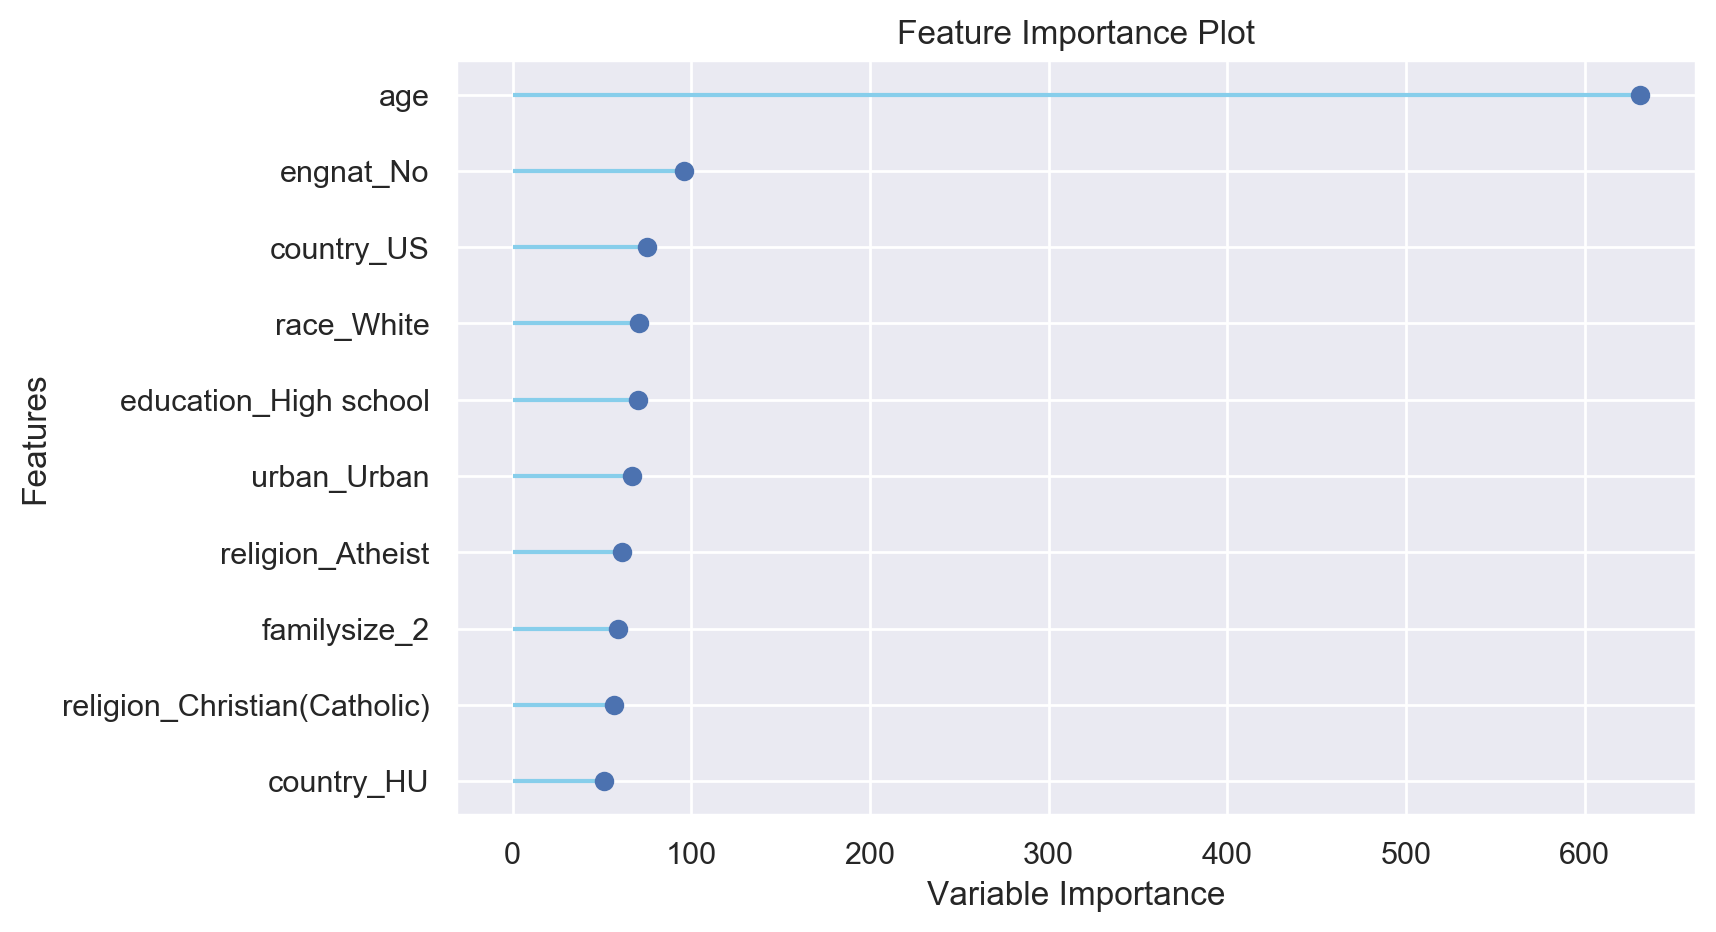

In [14]:
plot_model(estimator=lgbm, plot = "feature")

In [15]:
lgbm_cols = ["age", "country_US", "familysize_2", "race_White", "urban_Urban", "education_University degree", "engnat_No", "urban_Suburban", "religion_Atheist", "education_High school"]

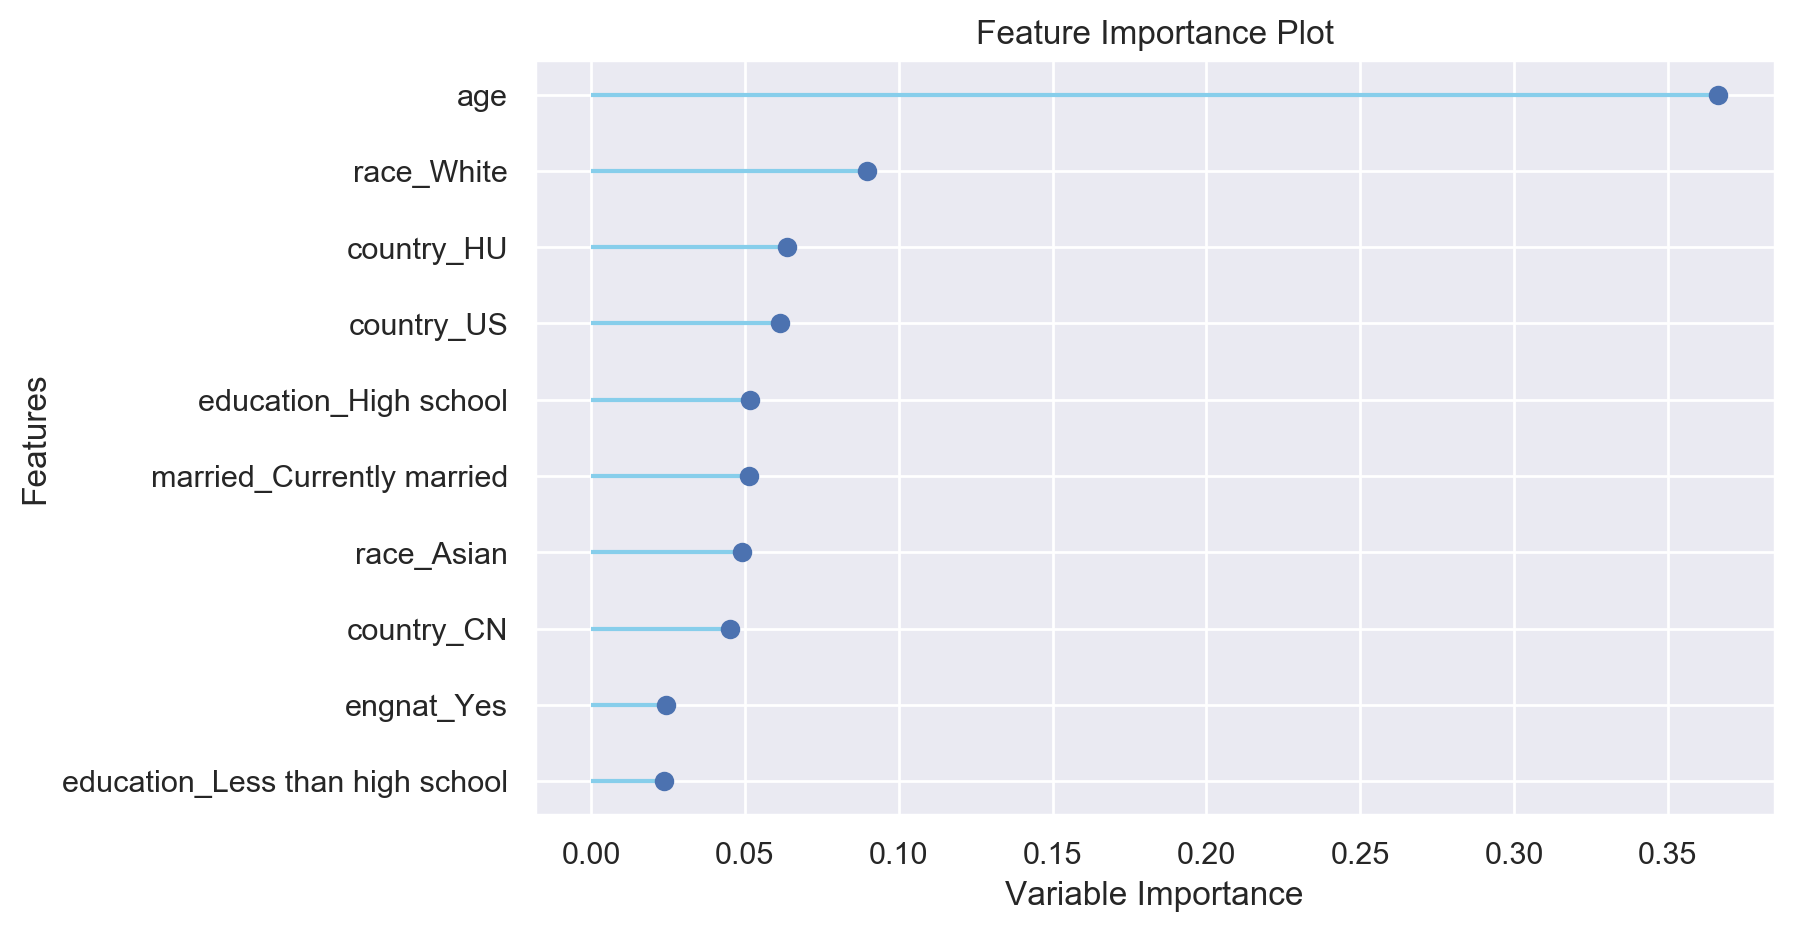

In [16]:
plot_model(estimator=gbc, plot = "feature")

In [17]:
gbc_cols = ["age", "race_White", "race_Asian", "country_CN", "coutry_HU", "married_Currently married", "country_US", "eductaion_High school", "country_CA", "education_Less than high school"]

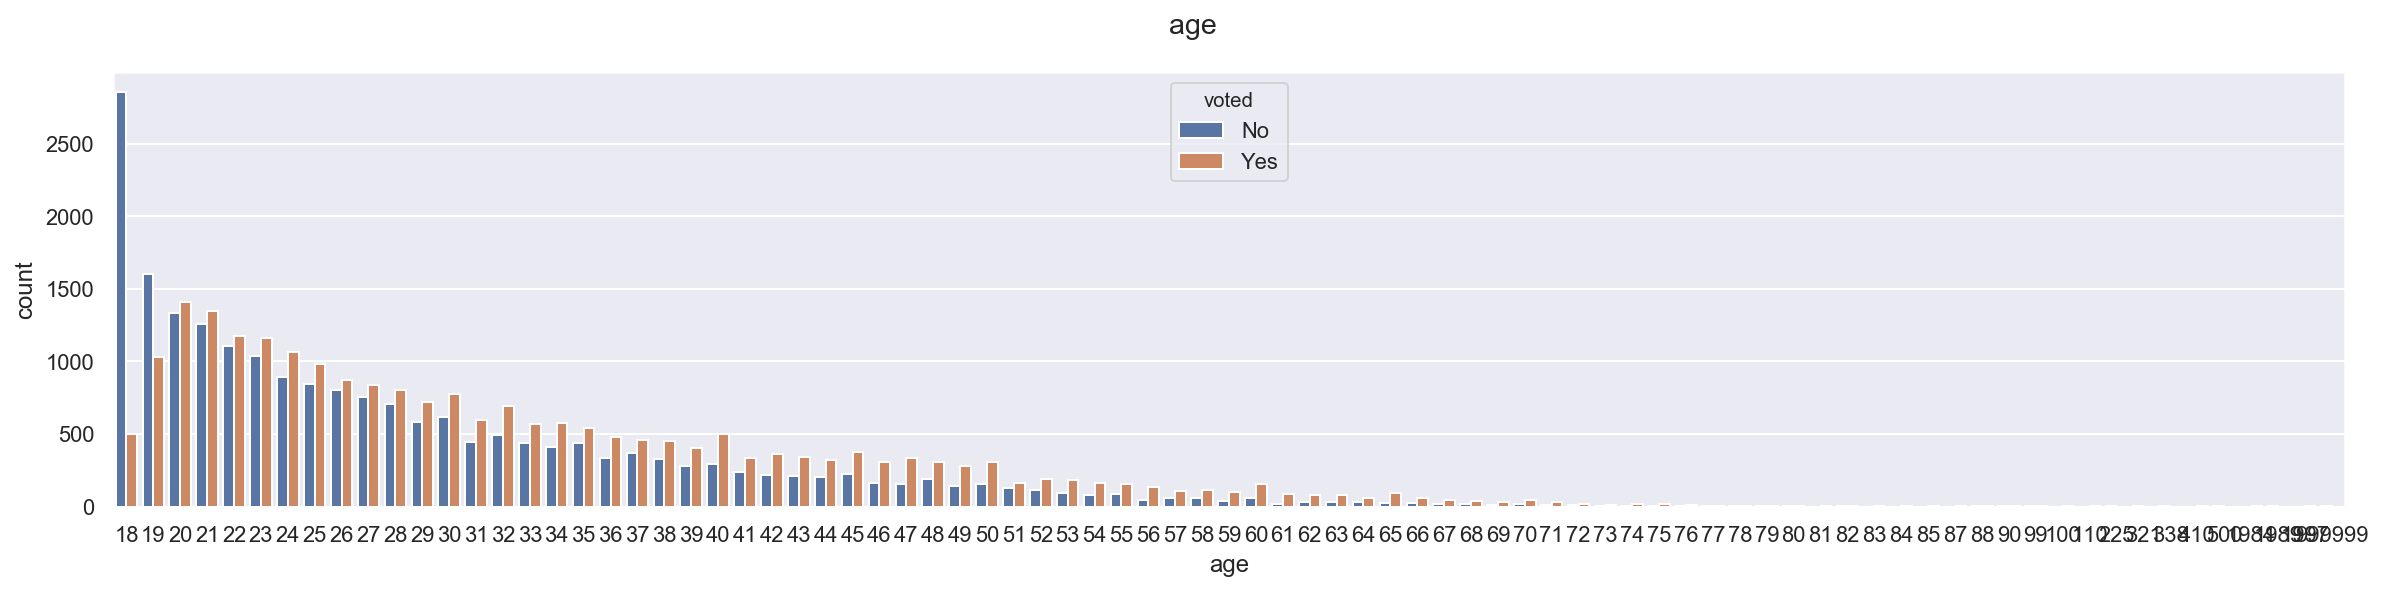

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)

fig.suptitle('age')


sns.countplot(df["age"], hue=df["voted"])


plt.show()

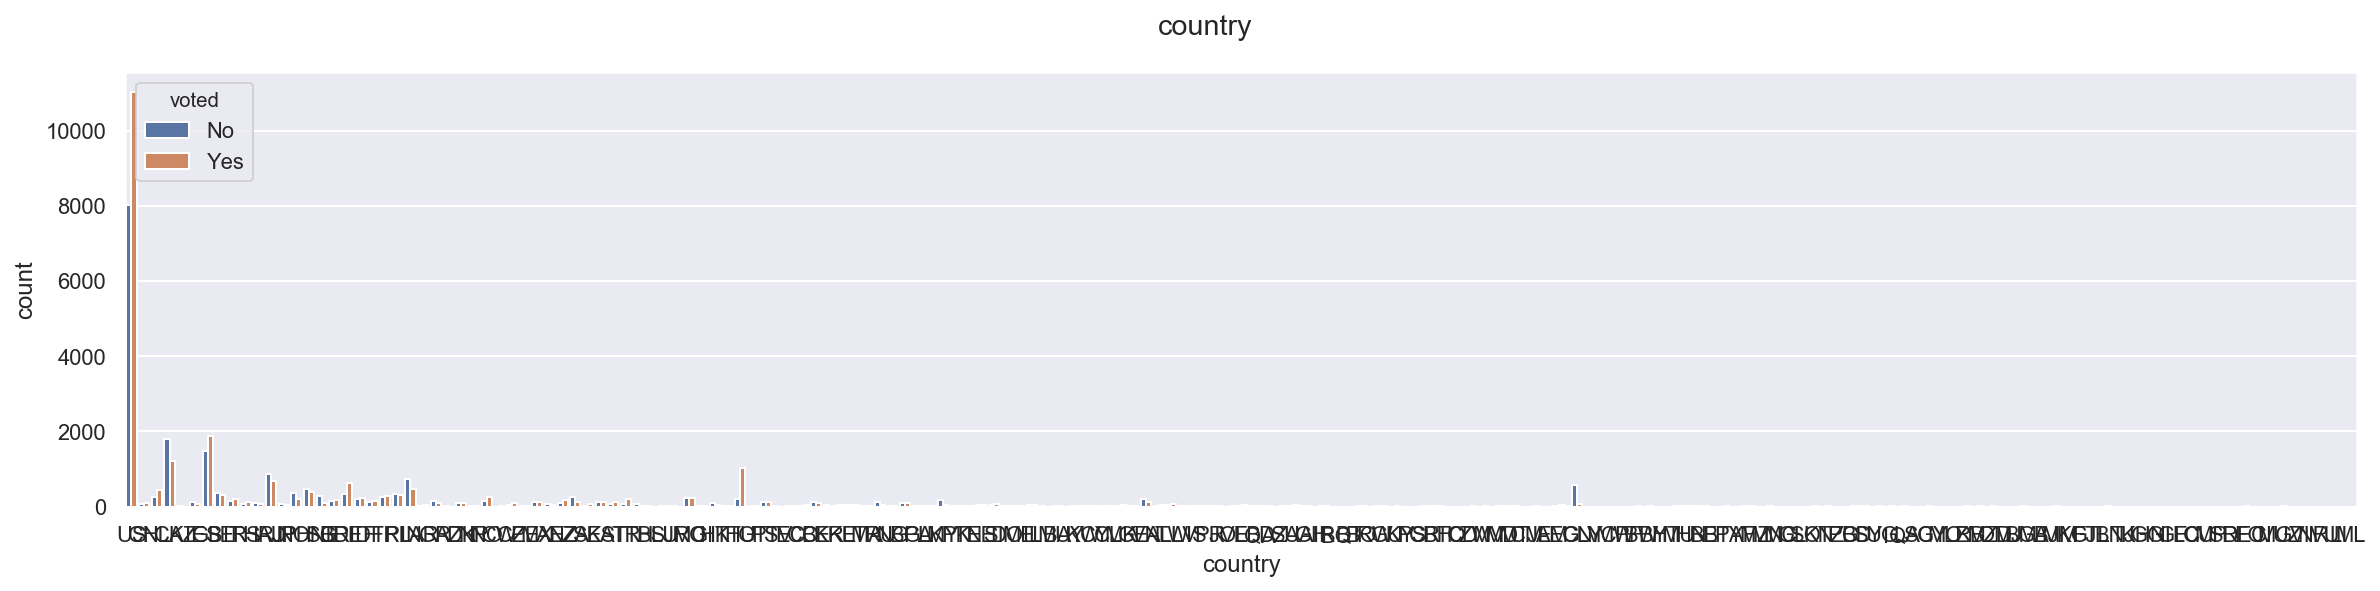

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)
fig.suptitle('country')
sns.countplot(df["country"], hue=df["voted"])
plt.show()

In [20]:
df_cntr = pd.DataFrame(df["country"].value_counts())

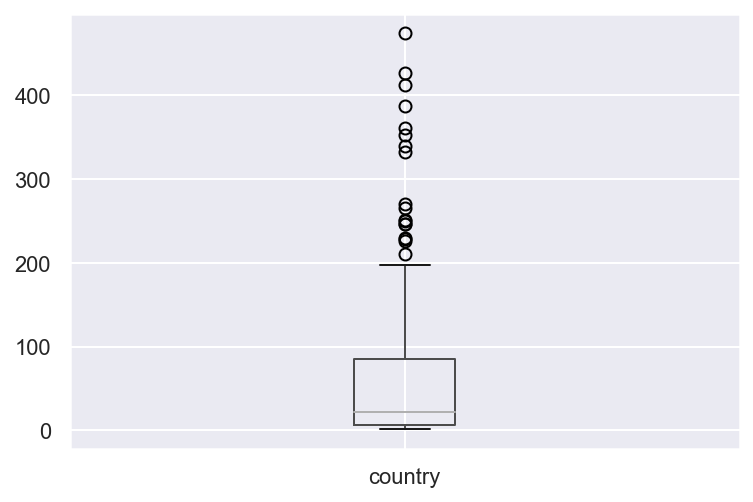

In [33]:
df_cntr[(df_cntr["country"]<500) & (df_cntr["country"]>1)].boxplot(column=['country'])

In [34]:
df_cntr['country'].describe()

count      176.000000
mean       253.460227
std       1480.587794
min          1.000000
25%          3.000000
50%         14.000000
75%        105.250000
max      19051.000000
Name: country, dtype: float64

In [42]:
over100_cntr = list(df_cntr[(df_cntr["country"]>100)].index)

In [68]:
over100_cntr.remove("US")

In [69]:
over100_cntr

['GB',
 'CA',
 'AU',
 'HU',
 'IN',
 'DE',
 'NONE',
 'NL',
 'SE',
 'PL',
 'CN',
 'PH',
 'FR',
 'RO',
 'ID',
 'NO',
 'ZA',
 'SG',
 'IT',
 'VN',
 'BR',
 'NZ',
 'FI',
 'TR',
 'ES',
 'GR',
 'MX',
 'PT',
 'BE',
 'MY',
 'DK',
 'AT',
 'IE',
 'BG',
 'RS',
 'HR',
 'CH',
 'RU',
 'CZ',
 'HK',
 'SI',
 'JP',
 'AE',
 'TW']

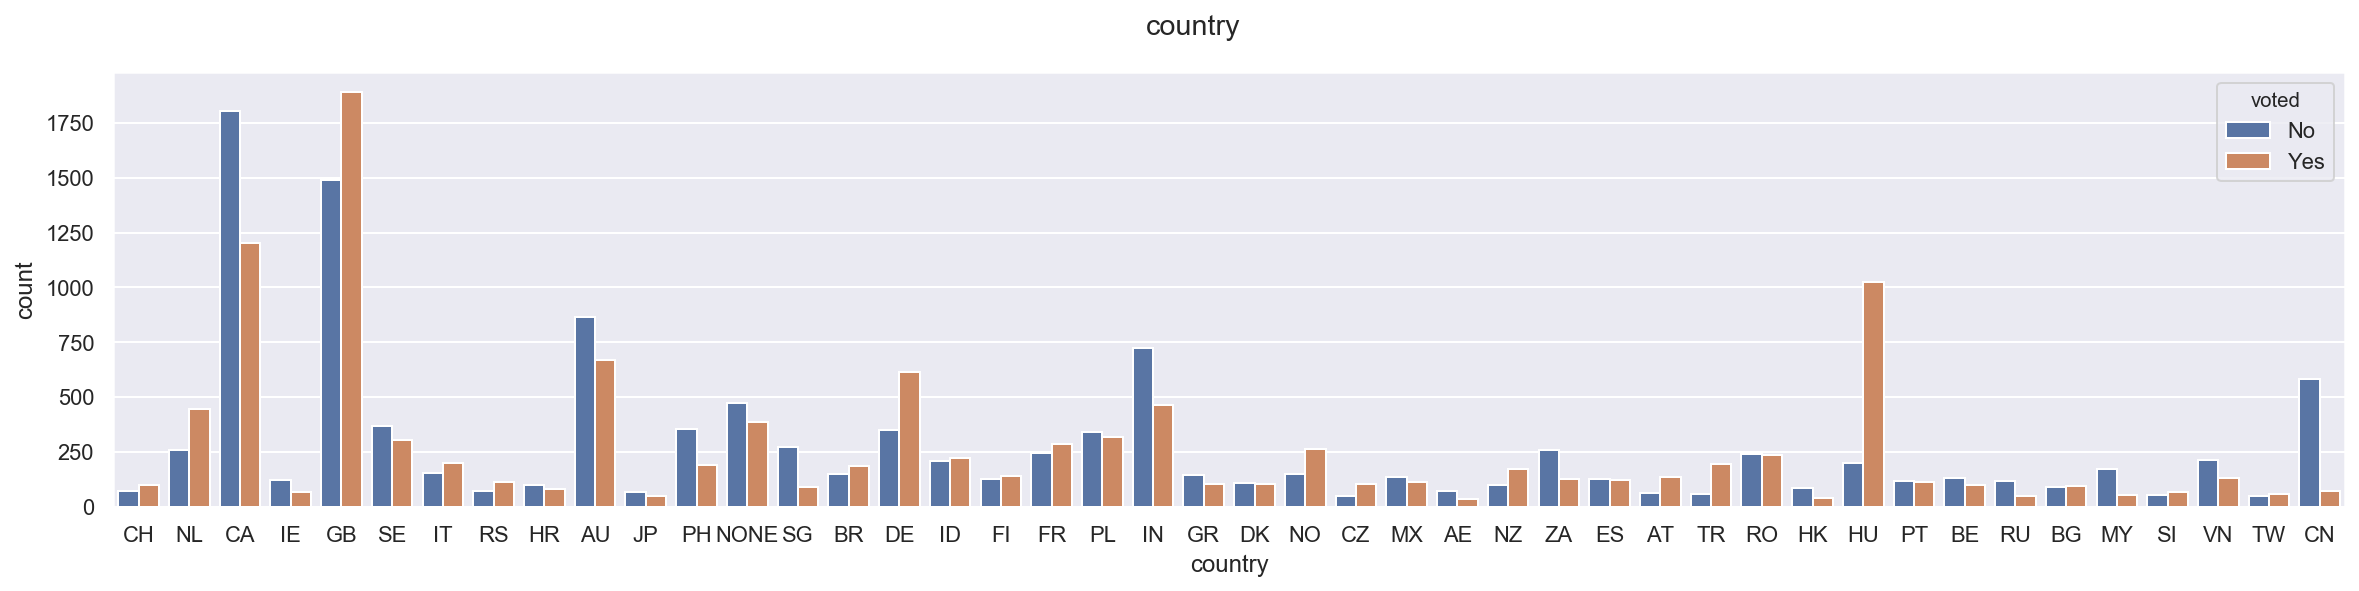

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)
fig.suptitle('country')
sns.countplot(df[df["country"].isin(over100_cntr)]["country"], hue=df["voted"])
plt.show()

In [65]:
over400_cntr = list(df_cntr[(df_cntr["country"]>400)].index)

In [71]:
over400_cntr.remove("US")

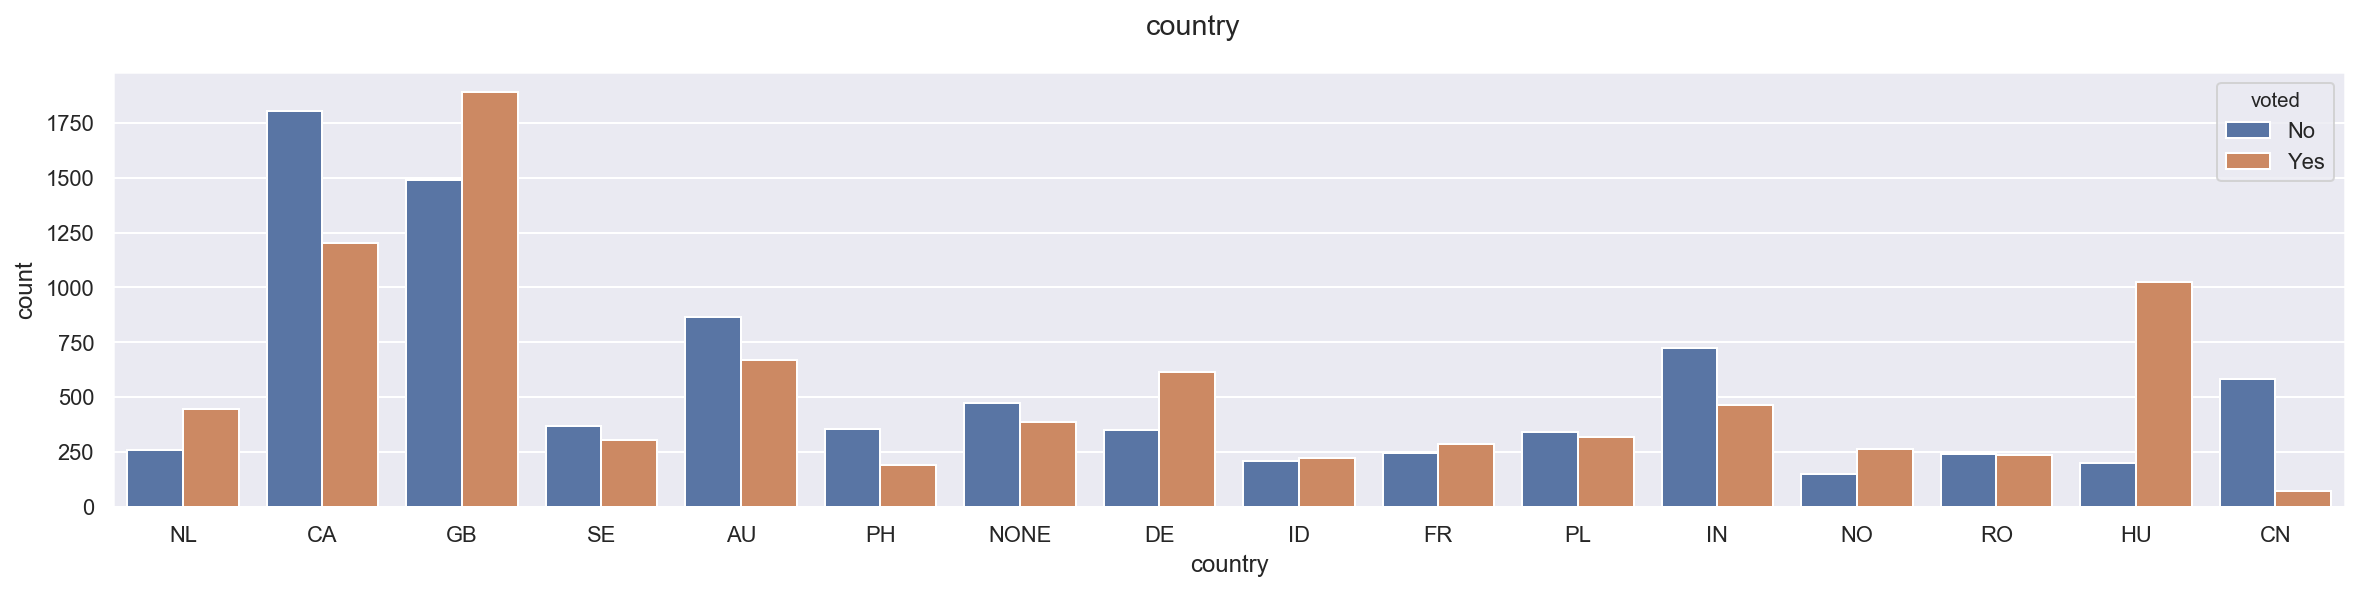

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)
fig.suptitle('country')
sns.countplot(df[df["country"].isin(over400_cntr)]["country"], hue=df["voted"])
plt.show()

In [73]:
less100_cntr = list(df_cntr[(df_cntr["country"] < 100)].index)

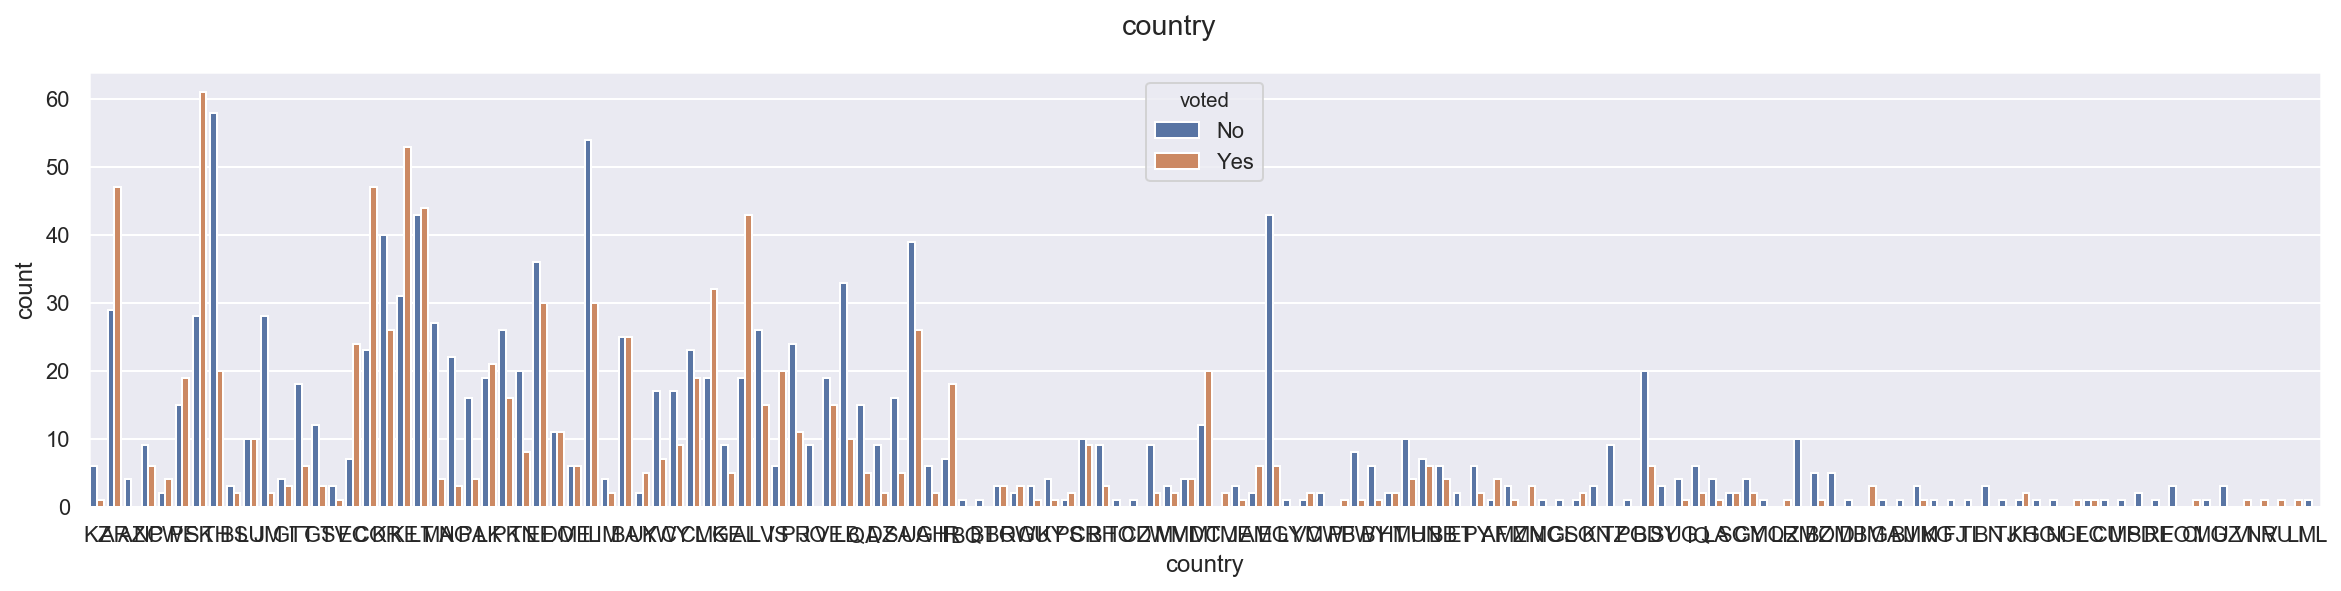

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)
fig.suptitle('country')
sns.countplot(df[df["country"].isin(less100_cntr)]["country"], hue=df["voted"])
plt.show()

In [ ]:
pivot_table(df["country"], df["vote"])